In [5]:
import random
import matplotlib.pyplot as plt

In [8]:
class DeckCard:
    shapes = [ "Hearts", "Diamonds", "Clubs", "Spades" ]
    numbers = [ "A", "2", "3", "4", "5", "6", "7", "8", "9", "10", "J", "Q", "K" ]
    
    def __init__(self):
        self.cards = [Card(number, shape) for number in DeckCard.numbers for shape in DeckCard.shapes]
    
    def __str__(self):
        return ', '.join(str(card) for card in self.cards)
    def __repr__(self):
        return self.__str__()
    def shuffle(self):
        random.shuffle(self.cards)
    def draw(self):
        return self.cards.pop() if len(self.cards) > 0 else None
        
class Card:
    def __init__(self, number, shape):
        self.number = number
        self.shape = shape

    def __str__(self):
        return f"{self.number} {self.shape}"
    def __repr__(self):
        return self.__str__()

deck = DeckCard()
deck.shuffle()
deck


J Spades, 4 Spades, 5 Spades, 9 Spades, 3 Clubs, 8 Spades, 4 Clubs, 7 Diamonds, 4 Hearts, A Diamonds, 8 Hearts, Q Hearts, 6 Clubs, 2 Hearts, 9 Clubs, K Hearts, 8 Diamonds, 5 Diamonds, 3 Spades, Q Clubs, 6 Diamonds, J Hearts, 6 Spades, K Diamonds, 6 Hearts, 5 Hearts, 9 Hearts, J Clubs, 2 Clubs, 7 Spades, 8 Clubs, 2 Diamonds, 3 Diamonds, 10 Clubs, K Clubs, K Spades, 2 Spades, 4 Diamonds, Q Diamonds, J Diamonds, 10 Diamonds, 3 Hearts, 7 Hearts, A Clubs, Q Spades, 5 Clubs, 10 Hearts, 10 Spades, 9 Diamonds, A Hearts, 7 Clubs, A Spades

drawing 10 cards from the deck, without replacement

In [9]:
drawn_cards = [deck.draw() for _ in range(10) if deck.cards] or print("No more cards to draw")
drawn_cards

[A Spades,
 7 Clubs,
 A Hearts,
 9 Diamonds,
 10 Spades,
 10 Hearts,
 5 Clubs,
 Q Spades,
 A Clubs,
 7 Hearts]

PROBABILITY OF DRAWING A 2 BY SIMULATION

In [12]:
number_2_cards = [card for card in drawn_cards if card.number == "2"]
number_2_cards_simulated_probability = len(number_2_cards) / len(drawn_cards)
number_2_cards_simulated_probability

0.0

PROBABILITY OF DRAWING A 2 THEORITICALLY

In [ ]:
number_2_cards_theoretical_probability = 4 / len(deck.cards)

In [3]:

'''

probability of drawing a card with number 2
'''
number_2_cards = [card for card in deck.cards if card.number == "2"]
simulated_2_probability = len(number_2_cards) / len(deck.cards)
print(simulated_2_probability)
shape_hearts = [card for card in deck.cards if card.shape == "Hearts"]
simulated_heart_probability = len(shape_hearts) / len(deck.cards)
print(simulated_heart_probability)
suit_diamonds_3 = [card for card in deck.cards if card.shape == "Diamonds" and card.number == "3"]
simulated_diamonds_of_three_probability = len(suit_diamonds_3) / len(deck.cards)
print(simulated_diamonds_of_three_probability)

# THEORITICAL PROBABILITY
'''
probability of drawing a card THEORITICALLY
'''
numbr_2_cards_theoritical = 4
theory_2_probability = numbr_2_cards_theoritical / len(deck.cards)
print(theory_2_probability)

shape_of_heart_theoritical = 13
theory_heart_probability = shape_of_heart_theoritical / len(deck.cards)
print(theory_heart_probability)

suit_diamonds_3_theoritical = 1
theory_diamonds_of_three_probability = suit_diamonds_3_theoritical / len(deck.cards)
print(theory_diamonds_of_three_probability)




[8 Clubs, Q Diamonds, 8 Spades, K Diamonds, 6 Hearts, 8 Diamonds, 2 Diamonds, J Clubs, 4 Clubs, J Diamonds]
0.07142857142857142
0.2857142857142857
0.023809523809523808
0.09523809523809523
0.30952380952380953
0.023809523809523808


COMPARING THE SIMULATED AND THEORITICAL PROBABILITIES

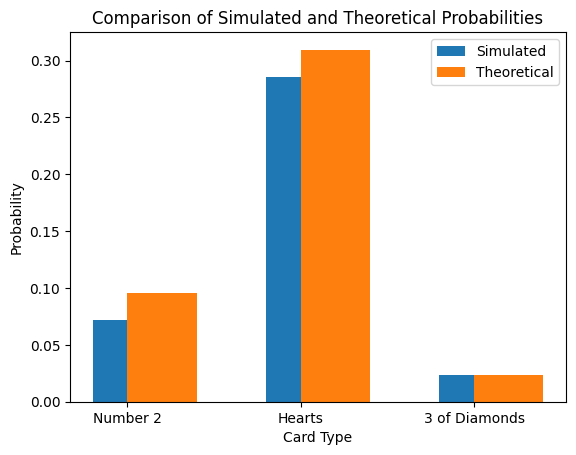

In [6]:
# Data for plotting
labels = ['Number 2', 'Hearts', '3 of Diamonds']
simulated_probs = [simulated_2_probability, simulated_heart_probability, simulated_diamonds_of_three_probability]
theoretical_probs = [theory_2_probability, theory_heart_probability, theory_diamonds_of_three_probability]

x = range(len(labels))  # the label locations

# Plotting
fig, ax = plt.subplots()
ax.bar(x, simulated_probs, width=0.4, label='Simulated', align='center')
ax.bar(x, theoretical_probs, width=0.4, label='Theoretical', align='edge')

# Adding labels and title
ax.set_xlabel('Card Type')
ax.set_ylabel('Probability')
ax.set_title('Comparison of Simulated and Theoretical Probabilities')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Show plot
plt.show()